## The practical deeds of networkx

In [2]:
import networkx as nx

#### In addition to the views Graph.edges, and Graph.adj, access to edges and neighbors is possible using subscript notation.

In [3]:
import pickle

# This makes it intuitive to access

G = nx.Graph()
G.add_nodes_from('NODES')
G['N'] # for nodes
G.add_weighted_edges_from([('N', 'O', 3.0)])
G['N']['O']

del(G) 

# Saved in first notebook
G = pickle.load(open('../Data/Districts_of_Gujarat.pickle', 'rb'))

In [4]:
# I like to add 2 sets of information to the existing graph
# 1) number of population at each node
# 2) weight to the edges

import numpy as np


# Make 1)

# Make a list of G's nodes
nodes_of_G = G.nodes()
nodes_list = list(nodes_of_G)

# Generate random values for each node in nodes_list
random_values = [np.random.randint(10000, 1000001) for _ in nodes_list]

# Print the mapping of nodes to random values
node_to_random_value = dict(zip(nodes_list, random_values))

# Assign attibute to each nude
G_weighted = G.copy()  # Create a copy of the original graph
nx.set_node_attributes(G_weighted, node_to_random_value, 'Population')

# Verify
G_weighted.nodes['Anand']['Population']
# More general but longer
#nx.get_node_attributes(G_weighted, 'Population')

859111

In [5]:
# 2)

# Apply the same procedure for edges
edges_of_G = G.edges()
edges_list = list(edges_of_G)

random_values = [np.random.randint(1, 101) for _ in edges_list]
edges_to_random_value = dict(zip(edges_list, random_values))

nx.set_edge_attributes(G_weighted, edges_to_random_value, 'Speed')

# Full inspection
nx.get_edge_attributes(G_weighted, 'Speed')

{('Ahmedabad', 'Anand'): 69,
 ('Ahmedabad', 'Bhavnagar'): 35,
 ('Ahmedabad', 'Botad'): 82,
 ('Ahmedabad', 'Gandhinagar'): 90,
 ('Ahmedabad', 'Kheda'): 11,
 ('Ahmedabad', 'Mehsana'): 37,
 ('Ahmedabad', 'Surendranagar'): 15,
 ('Anand', 'Bharuch'): 38,
 ('Anand', 'Kheda'): 96,
 ('Anand', 'Vadodara'): 54,
 ('Bhavnagar', 'Amreli'): 96,
 ('Bhavnagar', 'Botad'): 60,
 ('Botad', 'Amreli'): 90,
 ('Botad', 'Rajkot'): 86,
 ('Botad', 'Surendranagar'): 11,
 ('Gandhinagar', 'Aravalli'): 26,
 ('Gandhinagar', 'Kheda'): 4,
 ('Gandhinagar', 'Mehsana'): 81,
 ('Gandhinagar', 'Sabarkantha'): 77,
 ('Kheda', 'Aravalli'): 56,
 ('Kheda', 'Mahisagar'): 53,
 ('Kheda', 'Panchmahal'): 82,
 ('Kheda', 'Vadodara'): 38,
 ('Mehsana', 'Banaskantha'): 54,
 ('Mehsana', 'Patan'): 95,
 ('Mehsana', 'Sabarkantha'): 53,
 ('Mehsana', 'Surendranagar'): 35,
 ('Surendranagar', 'Kachchh'): 80,
 ('Surendranagar', 'Morbi'): 26,
 ('Surendranagar', 'Patan'): 28,
 ('Surendranagar', 'Rajkot'): 25,
 ('Amreli', 'Gir Somnath'): 15,
 ('Amreli

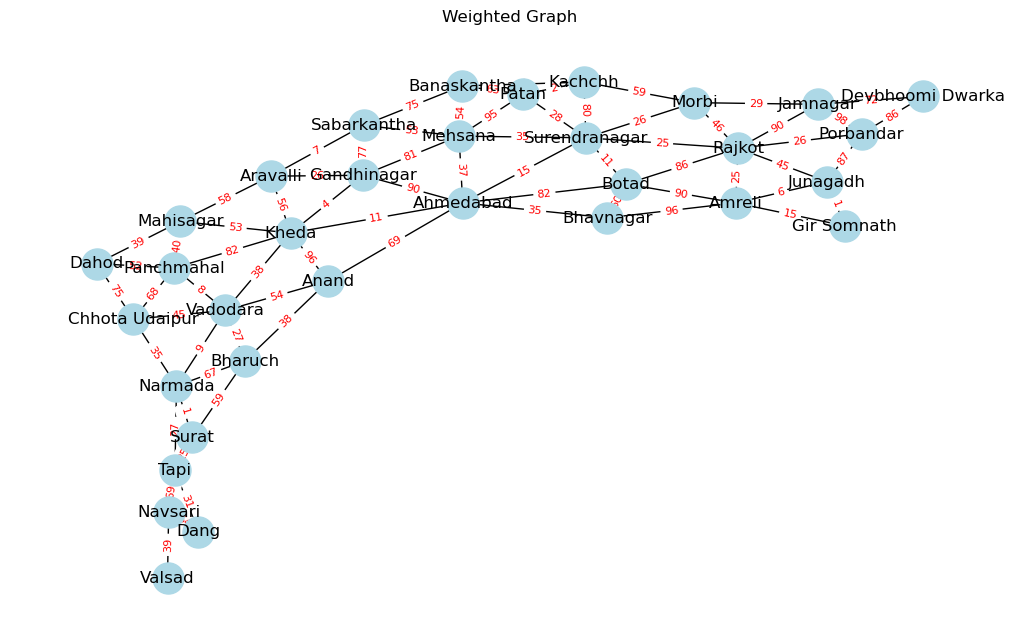

In [6]:
import matplotlib.pyplot as plt

# Let us visualize the complete graph

pos = nx.spring_layout(G_weighted)

# Get edge weights
edge_weights = {(u, v): d['Speed'] for u, v, d in G_weighted.edges(data=True)}

# Plot the graph with edge weights
plt.figure(figsize=(10,6))
nx.draw(G_weighted, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_color='black')
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=edge_weights, font_size=8, font_color='red')
plt.title("Weighted Graph")
plt.show()

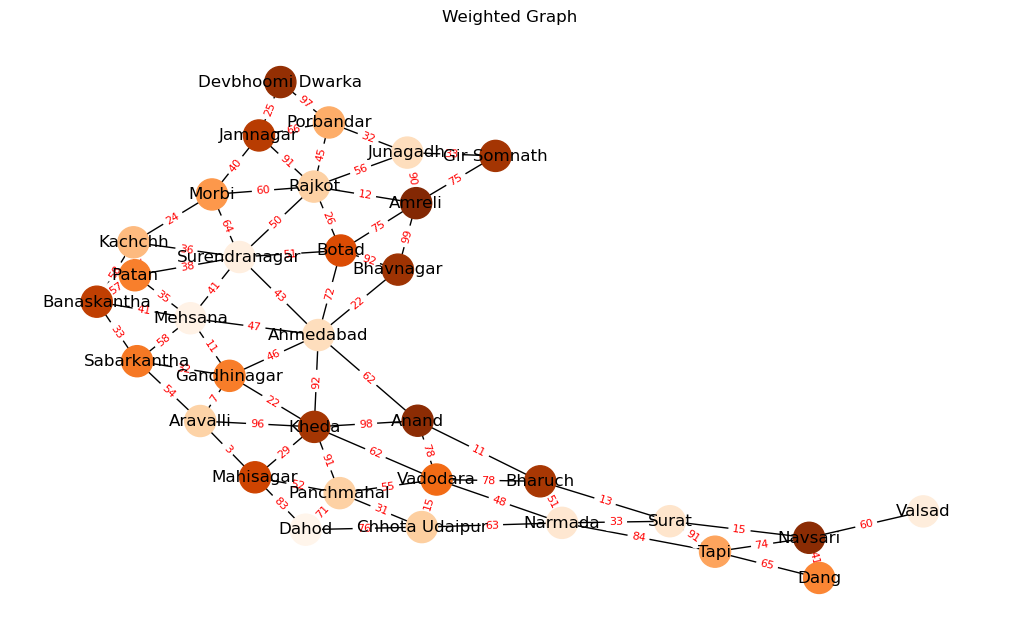

In [64]:
# Let's adjust the shinyness of each node according to the population

populations = [data['Population'] for _, data in G_weighted.nodes(data=True)]

# Create a colormap based on the 'Population' values
cmap = plt.get_cmap('Oranges_r')
node_colors = [cmap(population / max(populations)) for population in populations]

pos = nx.spring_layout(G_weighted)

# Get edge weights
edge_weights = {(u, v): d['Speed'] for u, v, d in G_weighted.edges(data=True)}

# Plot the graph with edge weights
plt.figure(figsize=(10,6))
nx.draw(G_weighted, pos, with_labels=True, node_size=500, node_color=node_colors, font_size=12, font_color='black')
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=edge_weights, font_size=8, font_color='red')
plt.title("Weighted Graph")
plt.show() 


Nice map, light nodes indicat highly populated regions (>500000) and darker regions poorly populated ones (<500000). 

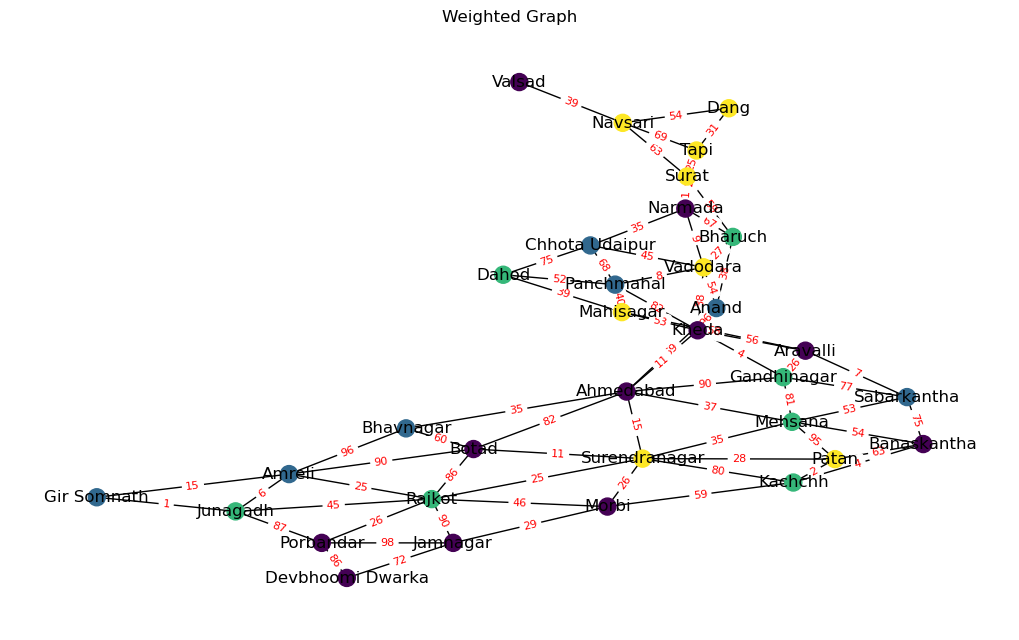

In [31]:
# Apply greedy coloring
G.clear()
G = G_weighted.copy()

gr_col = nx.greedy_color(G, strategy='largest_first', interchange=False)

# Plot the graph with node colors
pos = nx.spring_layout(G)
plt.figure(figsize=(10,6))

nx.draw(G, pos, with_labels=True, node_size=150, node_color=[val for _, val in gr_col.items()], font_size=12, font_color='black')
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=edge_weights, font_size=8, font_color='red')

plt.title("Weighted Graph")
plt.show() 

<function dict.values>